In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from Bio import SeqIO

In [123]:
# Reading the FASTQ file: 100 uM Bad BH3 sample

data=[]
fastq_path = "SRR5372708.fastq"
for record in SeqIO.parse(fastq_path, "fastq"):
    data.append({
        'ID': record.id,
        'Sequence': str(record.seq),
    })

# Convert list to DataFrame
df = pd.DataFrame(data)

# Provide a name for the output csv file
name='binders_100uM_Bad'

df

,ID,Sequence
0,SRR5372708.1.1,TGGATTCGTGAATCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...
1,SRR5372708.1.2,GTAGCTCTGGTTTGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...
2,SRR5372708.2.1,AGCACATAACATTCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...
3,SRR5372708.2.2,TTCGCAGGGGGATGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...
4,SRR5372708.3.1,CAAATAGGGTTCTCCTTAACCAGATTCGAAAAGCGGCAATCCAACG...
...,...,...
440529,SRR5372708.220265.2,TCTAAAAAGAACTGAGAGAGCCCACAACCAGGTATCGGACTACGGG...
440530,SRR5372708.220266.1,GATGTATTTACTTCCTTAACCNGATTCGAAAAGCGGCAATCCAACG...
440531,SRR5372708.220266.2,CGGGAGCGTGATTGAGAGAGCCCACAACCAGGTATCGGACTACGGG...
440532,SRR5372708.220267.1,TAAAAGGCAGAGTCCTTAACCNGATTCGAAAAGCGGCTTATTACCA...


In [124]:
# Based on the ID, to separate them into 3 columns
df[['ID', 'Read', 'Number']] = df['ID'].str.split(".",expand=True)
df

,ID,Sequence,Read,Number
0,SRR5372708,TGGATTCGTGAATCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,1,1
1,SRR5372708,GTAGCTCTGGTTTGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,1,2
2,SRR5372708,AGCACATAACATTCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,2,1
3,SRR5372708,TTCGCAGGGGGATGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,2,2
4,SRR5372708,CAAATAGGGTTCTCCTTAACCAGATTCGAAAAGCGGCAATCCAACG...,3,1
...,...,...,...,...
440529,SRR5372708,TCTAAAAAGAACTGAGAGAGCCCACAACCAGGTATCGGACTACGGG...,220265,2
440530,SRR5372708,GATGTATTTACTTCCTTAACCNGATTCGAAAAGCGGCAATCCAACG...,220266,1
440531,SRR5372708,CGGGAGCGTGATTGAGAGAGCCCACAACCAGGTATCGGACTACGGG...,220266,2
440532,SRR5372708,TAAAAGGCAGAGTCCTTAACCNGATTCGAAAAGCGGCTTATTACCA...,220267,1


In [125]:
# Filter for read quality by look at conserve regions
bc=pd.DataFrame(columns=['Read1','Read2'])
bc['Read1']=df[df['Number']=='1']['Sequence'].tolist()
bc['Read2']=df[df['Number']=='2']['Sequence'].tolist()
bc.reset_index(drop=True)

bc=bc[bc.Read1.str.slice(22,37) == 'GATTCGAAAAGCGGC']
bc=bc[bc.Read1.str.slice(47,62) == 'GCTTCAATAAAGGAG']
bc=bc[bc.Read2.str.slice(22,37) == 'CACAACCAGGTATCG']
bc=bc[bc.Read2.str.slice(47,62) == 'ATTAGTTATGTCACG']

# Grab just the barcodes
bc['Read1_short']=bc.Read1.str.slice(37,47)
bc['Read2_short']=bc.Read2.str.slice(37,47)

bc

,Read1,Read2,Read1_short,Read2_short
0,TGGATTCGTGAATCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,GTAGCTCTGGTTTGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,TTATTACCAT,TGTAACTTGT
1,AGCACATAACATTCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,TTCGCAGGGGGATGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,TTATTACCAT,TGTAACTTGT
2,CAAATAGGGTTCTCCTTAACCAGATTCGAAAAGCGGCAATCCAACG...,TCTTAGGCGTAGTGAGAGAGCCCACAACCAGGTATCGGGCGGGTGC...,AATCCAACGA,GGCGGGTGCG
3,CTGATTGTGATATCCTTAACCAGATTCGAAAAGCGGCAGTAGATCG...,ACTTGTAATAAGTGAGAGAGCCCACAACCAGGTATCGGCTATTCTG...,AGTAGATCGT,GCTATTCTGT
4,CCTGCGTCGAATTCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,AGTGAAGGAACATGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,TTATTACCAT,TGTAACTTGT
...,...,...,...,...
220262,GTCCTTAAGGGGTCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,AGCATAGGGGTGTGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,TTATTACCAT,TGTAACTTGT
220263,CGGGGGACATGTTCCTTAACCAGATTCGAAAAGCGGCACTCCAACG...,ATCTGAATGCCATGAGAGAGCCCACAACCAGGTATCGGACTACGGG...,ACTCCAACGA,GACTACGGGG
220264,CGCCCGAGTGGTTCCTTAACCNGATTCGAAAAGCGGCTTATTACCA...,TCTAAAAAGAACTGAGAGAGCCCACAACCAGGTATCGGACTACGGG...,TTATTACCAT,GACTACGGGG
220265,GATGTATTTACTTCCTTAACCNGATTCGAAAAGCGGCAATCCAACG...,CGGGAGCGTGATTGAGAGAGCCCACAACCAGGTATCGGACTACGGG...,AATCCAACGA,GACTACGGGG


In [129]:
#replace the barcodes with the protein they represent
#MATa barcodes
bc = bc.replace(['TCTGAATCAA','TTATTACCAT','GGTTCTATAA','AGTAGATCGT','CTCACGTGTG','AATCCAACGA'],['Bcl-2','Bcl-B','Bcl-XL','Bfl-1','Bcl-W','Mcl-1'])
#MATalpha de novo binder barcodes
bc = bc.replace(['GTCAACTATT','ATACCTGTAC','TGTAACTTGT','GACTACGGGG','GCTATTCTGT','CCGTAAGGCT','GGGTGAGGTG','TGTGGTAATG','GGCGGGTGCG'],['F21','F30D','B+','B-CDP01','B40A','2+','4LVT','X-CDP07','MINDI'])
#MATalpha BH3 peptide barcodes
bc = bc.replace(['GAGAGTACGG','TCGTAAAGCG','AGGTGATCAT','CAGTTTTGTG','AGCTTGACAA','GTAATGTACT','TATCGAGTAT'],['Bim','Noxa','Puma','Bad','Bik','Hrk','Bmf'])

# Filter for correct barcodes only: ALL binders and peptides
bc=bc[(bc.Read1_short == 'Bfl-1') | (bc.Read1_short=='Bcl-B') | (bc.Read1_short=='Bcl-2') | (bc.Read1_short=='Bcl-XL') | (bc.Read1_short=='Bcl-W') | (bc.Read1_short=='Mcl-1')]
bc=bc[(bc.Read2_short == 'F21') | (bc.Read2_short=='F30D') | (bc.Read2_short=='B+') | (bc.Read2_short=='B-CDP01') | (bc.Read2_short=='B40A') | (bc.Read2_short=='2+') | (bc.Read2_short=='4LVT') | (bc.Read2_short=='X-CDP07') | (bc.Read2_short=='MINDI') | (bc.Read2_short=='Bim') 
| (bc.Read2_short=='Noxa') | (bc.Read2_short=='Puma') | (bc.Read2_short=='Bad') | (bc.Read2_short=='Bik') | (bc.Read2_short=='Hrk') | (bc.Read2_short=='Bmf')]

In [130]:
bc

,Read1,Read2,Read1_short,Read2_short
0,TGGATTCGTGAATCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,GTAGCTCTGGTTTGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,Bcl-B,B+
1,AGCACATAACATTCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,TTCGCAGGGGGATGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,Bcl-B,B+
2,CAAATAGGGTTCTCCTTAACCAGATTCGAAAAGCGGCAATCCAACG...,TCTTAGGCGTAGTGAGAGAGCCCACAACCAGGTATCGGGCGGGTGC...,Mcl-1,MINDI
3,CTGATTGTGATATCCTTAACCAGATTCGAAAAGCGGCAGTAGATCG...,ACTTGTAATAAGTGAGAGAGCCCACAACCAGGTATCGGCTATTCTG...,Bfl-1,B40A
4,CCTGCGTCGAATTCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,AGTGAAGGAACATGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,Bcl-B,B+
...,...,...,...,...
220261,GCTTTACCGTCATCCTTAACCAGATTCGAAAAGCGGCAATCCAACG...,GACTTAACTTGTTGAGAGAGCCCACAACCAGGTATCGGGCGGGTGC...,Mcl-1,MINDI
220262,GTCCTTAAGGGGTCCTTAACCAGATTCGAAAAGCGGCTTATTACCA...,AGCATAGGGGTGTGAGAGAGCCCACAACCAGGTATCGTGTAACTTG...,Bcl-B,B+
220264,CGCCCGAGTGGTTCCTTAACCNGATTCGAAAAGCGGCTTATTACCA...,TCTAAAAAGAACTGAGAGAGCCCACAACCAGGTATCGGACTACGGG...,Bcl-B,B-CDP01
220265,GATGTATTTACTTCCTTAACCNGATTCGAAAAGCGGCAATCCAACG...,CGGGAGCGTGATTGAGAGAGCCCACAACCAGGTATCGGACTACGGG...,Mcl-1,B-CDP01


In [134]:
# Confirm the table is the same as shown in Younger's codes 
contingency_table = pd.crosstab(bc['Read2_short'], bc['Read1_short'])
contingency_table

Read1_short,Bcl-2,Bcl-B,Bcl-W,Bcl-XL,Bfl-1,Mcl-1
Read2_short,,,,,,
2+,1009,81,575,79,233,32
4LVT,360,92,1151,16,199,45
B+,182,39055,393,17,1258,290
B-CDP01,211,13644,593,32,5905,3882
B40A,55,25047,340,95,2348,239
Bim,1,8,32,36,81,81
Bmf,1,0,0,0,0,0
F21,133,1534,468,15,32801,461
F30D,74,866,230,73,19275,141


In [135]:
# Remove columns and rows. Reorder the table for the figure purpose. 
contingency_table.drop(['Mcl-1'],axis=1,inplace=True)
contingency_table.drop(['Bim','Bmf','MINDI','Puma'],axis=0,inplace=True)
contingency_table=contingency_table[['Bfl-1','Bcl-B','Bcl-2','Bcl-XL','Bcl-W']]
contingency_table=contingency_table.reindex(['F21','F30D','B+','B-CDP01','B40A','2+','4LVT','X-CDP07'])
contingency_table

Read1_short,Bfl-1,Bcl-B,Bcl-2,Bcl-XL,Bcl-W
Read2_short,,,,,
F21,32801,1534,133,15,468
F30D,19275,866,74,73,230
B+,1258,39055,182,17,393
B-CDP01,5905,13644,211,32,593
B40A,2348,25047,55,95,340
2+,233,81,1009,79,575
4LVT,199,92,360,16,1151
X-CDP07,631,7325,88,115,9910


In [137]:
bc_stack=contingency_table.stack(future_stack=True).reset_index()

In [138]:
bc_stack

,Read2_short,Read1_short,0
0,F21,Bfl-1,32801
1,F21,Bcl-B,1534
2,F21,Bcl-2,133
3,F21,Bcl-XL,15
4,F21,Bcl-W,468
5,F30D,Bfl-1,19275
6,F30D,Bcl-B,866
7,F30D,Bcl-2,74
8,F30D,Bcl-XL,73
9,F30D,Bcl-W,230


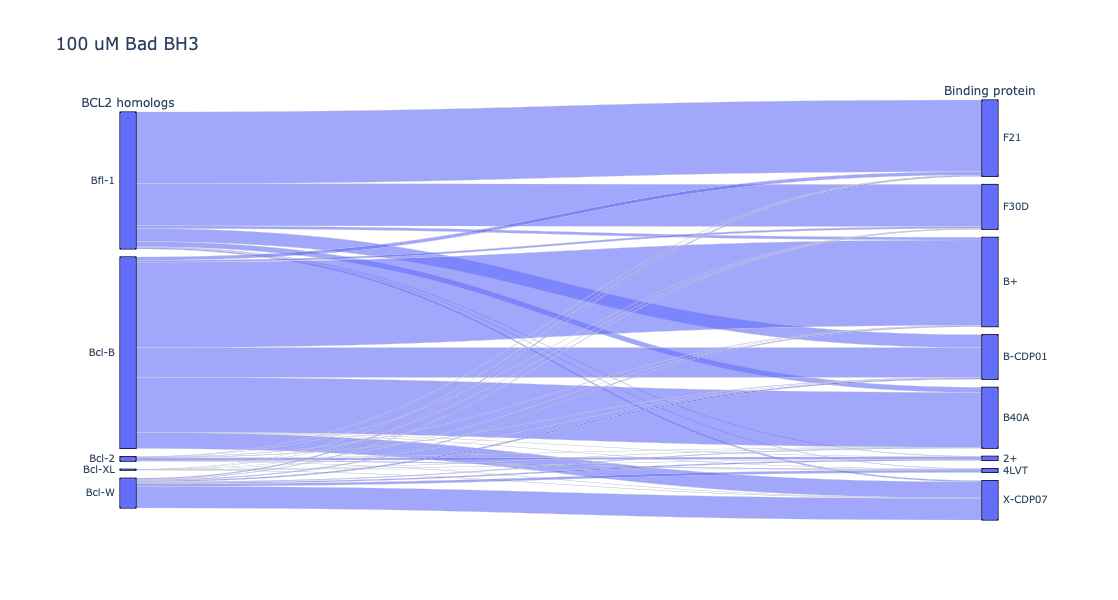

In [141]:
# Binding protein order is ['aBFL1','FECM04','aBCLB','BCDP01','BECM04','aBCL2','2CDP06','XCDP07']. 

fig = go.Figure(go.Parcats(
    dimensions=[
        {'label': 'BCL2 homologs', 'values': bc_stack['Read1_short']},
        {'label': 'Binding protein', 'values': bc_stack['Read2_short']}
    ],
    counts=bc_stack[0],line={'shape': 'hspline'}
))

fig.update_layout(width=600, height=600, title_text="100 uM Bad BH3")

fig.show()

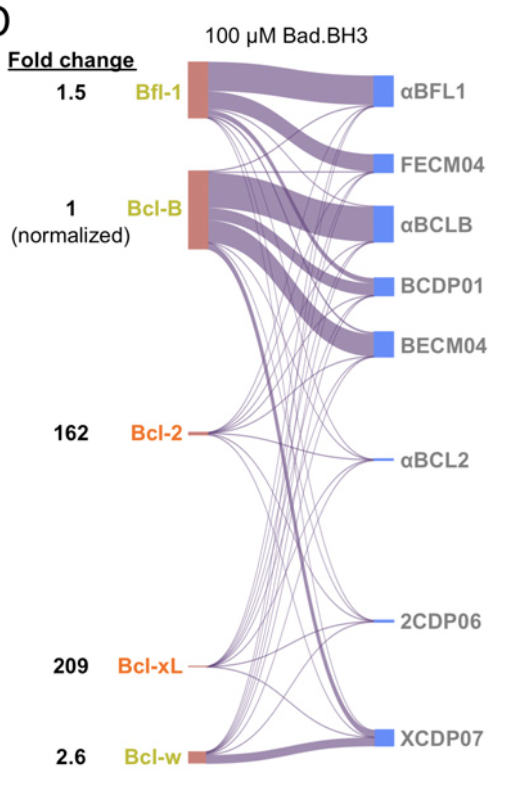

In [140]:
# Compared to Fig. 5D from the paper

# Binding protein order is ['aBFL1','FECM04','aBCLB','BCDP01','BECM04','aBCL2','2CDP06','XCDP07']. Same as the original figure

from IPython.display import Image
Image(filename='Fig5D.png') 